### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
import pandas as pd
df = pd.read_csv("data/toxicsorted.csv")

In [6]:
df.head()

,Emotion,Text,Random
0,joy,Walking down the drive is the longest part of ...,8675854986
1,toxic,Suitecivil your a pussy ass bitch i'd fucken k...,2128620793
2,anger,A colleague asked me to study with her. I coul...,4482406478
3,anger,I was angry about how the government acted con...,4685690966
4,joy,Ah!! I LOVE man deodorant! I didn't know other...,1930976523


In [7]:
# Value Counts
df['Emotion'].value_counts()

joy         10840
sadness      6597
fear         5296
toxic        5203
anger        4192
surprise     3990
neutral      2219
disgust       841
shame         144
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

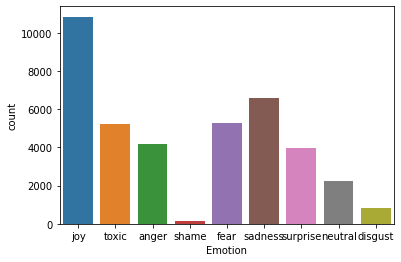

In [8]:
# Plot
sns.countplot(x='Emotion',data=df)

In [9]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text']

0        Walking down the drive is the longest part of ...
1        Suitecivil your a pussy ass bitch i'd fucken k...
2        A colleague asked me to study with her. I coul...
3        I was angry about how the government acted con...
4        Ah!! I LOVE man deodorant! I didn't know other...
                               ...                        
39317      That's like making children talk bad about t...
39318    Joy remember what I told you earlier about put...
39319     Oh yes , I loved it . Wasn't the scene with t...
39320    Only with   would I try to get a bottle of wat...
39321    My christmas decorations in my room are making...
Name: Clean_Text, Length: 39322, dtype: object

In [11]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [12]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['Clean_Text'] = df['Clean_Text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df['Clean_Text'][34844]

'heading natural state quality time'

In [13]:
df

,Emotion,Text,Random,Clean_Text
0,joy,Walking down the drive is the longest part of ...,8675854986,walking drive longest journey school
1,toxic,Suitecivil your a pussy ass bitch i'd fucken k...,2128620793,suitecivil pussy ass bitch i d fucken kick ass...
2,anger,A colleague asked me to study with her. I coul...,4482406478,colleague asked study her explain things perf...
3,anger,I was angry about how the government acted con...,4685690966,angry government acted concerning hainburg es...
4,joy,Ah!! I LOVE man deodorant! I didn't know other...,1930976523,ah love man deodorant know girls rt man...
...,...,...,...,...
39317,disgust,@OccupyWallStNYC That's like making children t...,3386560397,that s like making children talk bad parent di...
39318,joy,Joy remember what I told you earlier about put...,5717224347,joy remember told earlier putting
39319,joy,"Oh yes , I loved it . Wasn't the scene with t...",7703274024,oh yes loved scene judge great
39320,surprise,Only with @RoxanStuckey would I try to get a b...,8242834733,try bottle water realize tequila


In [14]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [15]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [16]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [17]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [18]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6486394846147325

In [21]:
# Make A Prediction
ex1 = "he was hitting me"


In [22]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [23]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.12871534, 0.15587065, 0.07688958, 0.22048963, 0.0549137 ,
        0.21516268, 0.00195874, 0.03305596, 0.11294371]])

In [24]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise', 'toxic'], dtype=object)

In [25]:
# # Save Model & Pipeline
# import joblib
# pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
# joblib.dump(pipe_lr,pipeline_file)
# pipeline_file.close()

In [26]:
def spell_check(word, n=2):
  ngram={}
  total=26**n
  for i in range(total):
    c=''
    k=i
    for j in range(n):
      c=chr(97+(k%26))+c
      k=k//26
      ngram[c]=set()
  lexicon=words.words()
  lexicon=[i.lower() for i in lexicon if i.isalnum()]
  for w in range(len(lexicon)):
    for c in range(0,len(lexicon[w])- n+1):
      ngram[lexicon[w][c:c+n]].add(w)
  freq_dict={}
  for c in range(0, len(word)-n+1):
    for w in ngram[word[c:c+n]]:
      if lexicon[w] not in freq_dict.keys():
        freq_dict[lexicon[w]]=1
      else:
        freq_dict[lexicon[w]]+=1
  top_freq=dict(sorted(freq_dict.items(),key=operator.itemgetter(1),reverse=True)[:5])
  return top_freq




In [27]:
def editDistance(str1, str2, m, n):

	if m == 0:
		return n

	if n == 0:
		return m

	if str1[m-1] == str2[n-1]:
		return editDistance(str1, str2, m-1, n-1)

	return 1 + min(editDistance(str1, str2, m, n-1), 
				editDistance(str1, str2, m-1, n), 
				editDistance(str1, str2, m-1, n-1) 
				)


In [28]:
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
from nltk.corpus import words
import operator
import nltk as nl

cuss_word_array_uppercase = ["Fuck","Fuck you","Ass","Shit","Piss off","Dick head","Asshole","Son of a bitch","Bastard","Bitch","Damn","Cunt","Bollocks","Bugger"
                                                            ,"Bloody Hell","Choad","Crikey","Rubbish","Shag","Wanker","Taking the piss","Twat","Bloody Oath"
                                                            , "Arse","Bloody","Bugger","Crap","Damn","Arsehole","Balls","Tits","Boobs","Cock","Dick","Pussy","Cunt","motherfuck","fatherfuck","Nigga"]
cuss_word_array_lowercase = []
for word in cuss_word_array_uppercase:
    cuss_word_array_lowercase.append(word.lower())




comment = "shubh is a shit motherfucker ass"
m={}


if (pipe_lr.predict([comment])) == 'toxic':


    #tokenization of words and removing punctuations in the sentence
    x = string.punctuation
    data = word_tokenize(comment)
    clean_punct_words = [w for w in data if w not in x]
    clean_words = [w for w in clean_punct_words if w not in stop]

    stemmed = []
    med = {}

    for i in clean_words:
        #apply snowball stemming
        stemmed.append(snow_stemmer.stem(i))

    #print(stemmed)
   
    for j in stemmed:
        cuss = {}
        if j in cuss_word_array_lowercase:
            for dd in spell_check(j).keys():
                cuss[dd] = nl.edit_distance(j, dd, transpositions=True)
                #cuss[dd] = editDistance(j, dd, len(j), len(dd))
                # print(j,"-> ", dd, "\n","The minimum edit distance is:", editDistance(j, dd, len(j), len(dd)))
            #print(cuss)
            med[j] = cuss
    print(med)



    
              




{'shit': {'cushion': 4, 'ship': 1, 'shirt': 1, 'ophite': 3, 'ophitic': 4}, 'motherfuck': {'mother': 4, 'other': 5, 'brother': 6, 'baluchitherium': 10, 'smooth': 7}, 'ass': {'mass': 1, 'tass': 1, 'brass': 2, 'glass': 2, 'grass': 2}}


In [29]:
for k in med.keys():
    print(k)
    x = min(med[k].values())
    for i in med[k].keys():
        if med[k][i] == x:
            print(i)
            comment = comment.replace(k,i)
            break

print(comment)





shit
ship
motherfuck
mother
ass
mass
shubh is a ship motherer mass
